In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import tensorflow.keras
import math as m

In [6]:
nihss_gen_df = pd.read_csv('/home/brugha/Desktop/Project/NIHSSdata/NIHSSgen.csv',header=4)
try:
    nihss_gen_df.drop(columns=['code','Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3','Unnamed: 5'],inplace=True)
except:
    pass

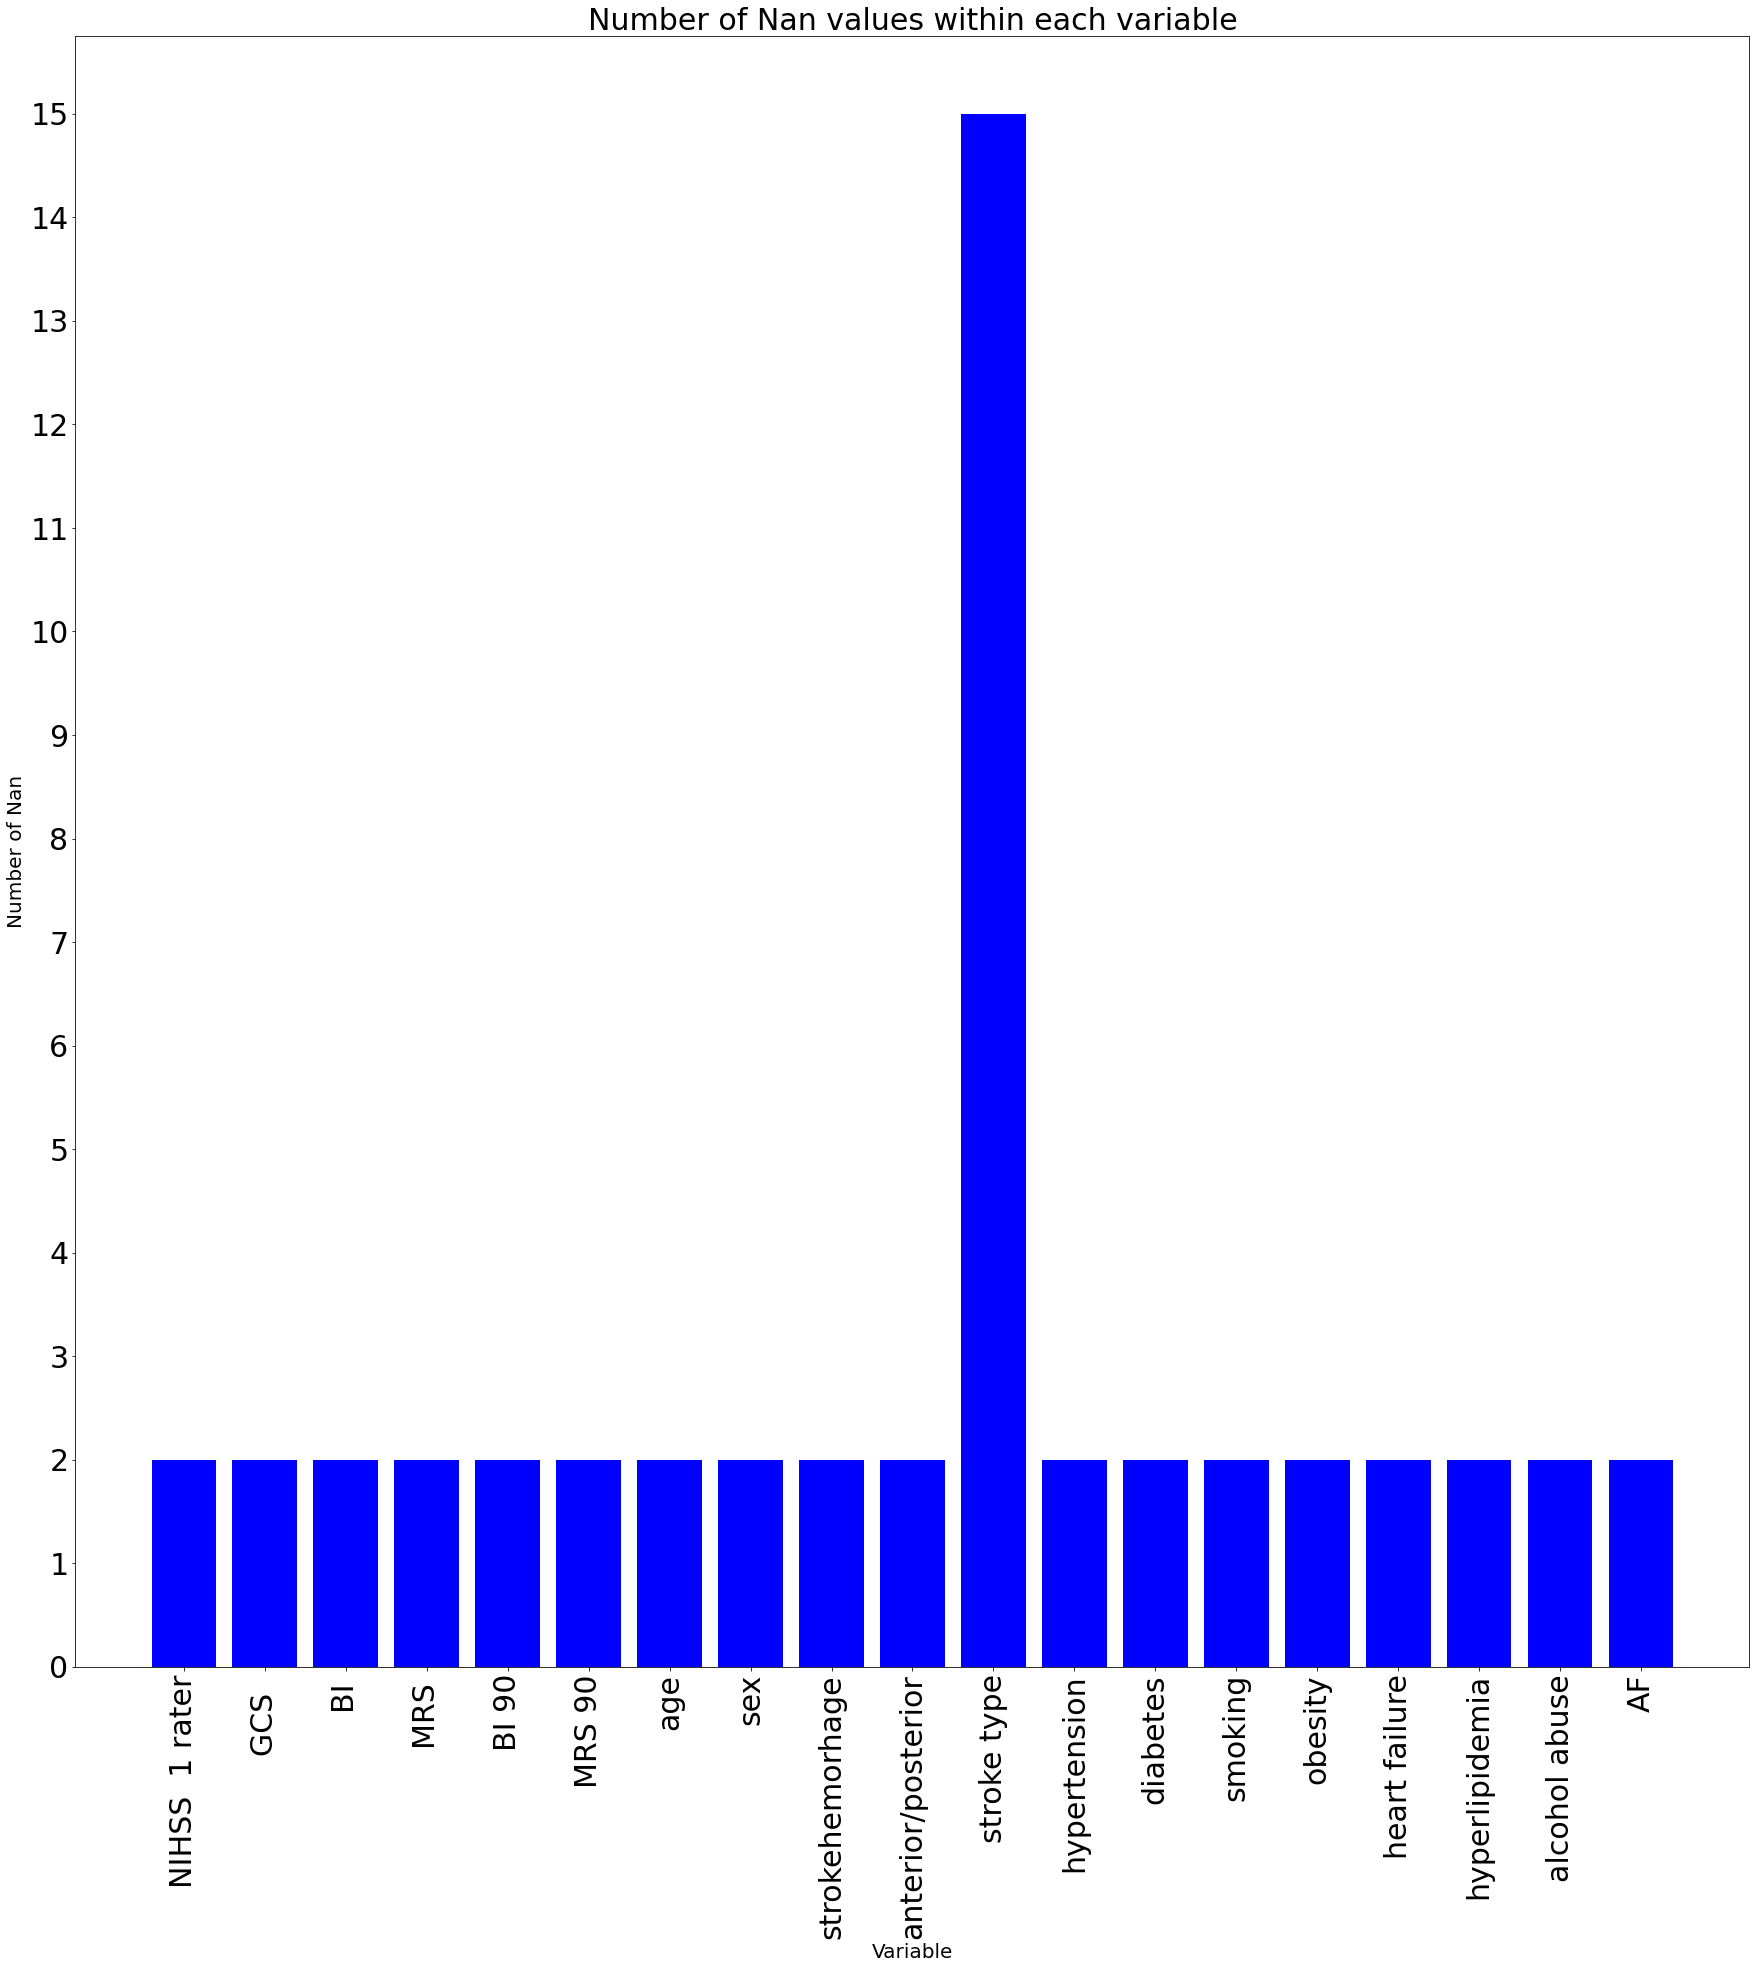

In [17]:
columns = list(nihss_gen_df.columns)
columns[10] = 'stroke type'

col = nihss_gen_df.iloc[:,:].isna().sum()
plt.figure(figsize=(30,30))
plt.tick_params(labelsize=30)
plt.title('Number of Nan values within each variable', fontsize=30)
plt.yticks(np.arange(0,max(col)+1, step=1))
plt.xticks(rotation=90)
plt.xlabel('Variable', fontsize=20)
plt.ylabel('Number of Nan', fontsize=20)
plt.bar(columns, col, color = 'b')
plt.savefig('./Nans NIHSS.jpg')

In [2]:
nihss_gen_df.dropna(axis=0,thresh=0.2, inplace=True)
nihss_gen_df.dropna(axis=1,thresh=0.2, inplace=True)
# translate to english from polish
# K is female, M is Male
for i in range(len(nihss_gen_df['sex'])):
    if nihss_gen_df['sex'].iloc[i] == 'K':
        nihss_gen_df['sex'].iloc[i] = 'F'

/tmp/ipykernel_115751/3455598996.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihss_gen_df['sex'].iloc[i] = 'F'


In [3]:
nihss_gen_df['sex'] = pd.factorize(nihss_gen_df['sex'])[0]
nihss_gen_df['strokehemorhage'] = pd.factorize(nihss_gen_df['strokehemorhage'])[0]
nihss_gen_df['anterior/posterior'] = pd.factorize(nihss_gen_df['anterior/posterior'])[0]
nihss_gen_df['storke typ'] = pd.factorize(nihss_gen_df['storke typ'])[0]

In [4]:
nihss_gen_df.iloc[:,0:]

,NIHSS 1 rater,GCS,BI,MRS,BI 90,MRS 90,age,sex,strokehemorhage,anterior/posterior,storke typ,hypertension,diabetes,smoking,obesity,heart failure,hyperlipidemia,alcohol abuse,AF
2,1.0,15.0,90.0,1.0,100.0,0.0,71.0,0,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,15.0,95.0,1.0,100.0,0.0,49.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,15.0,90.0,1.0,100.0,0.0,70.0,1,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.0,15.0,60.0,3.0,70.0,2.0,83.0,1,0,0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,6.0,15.0,100.0,1.0,100.0,0.0,54.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.0,15.0,95.0,1.0,100.0,0.0,63.0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
223,8.0,15.0,60.0,4.0,70.0,3.0,40.0,0,0,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
224,20.0,13.0,30.0,5.0,40.0,5.0,78.0,0,0,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
225,4.0,15.0,90.0,3.0,95.0,2.0,88.0,1,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


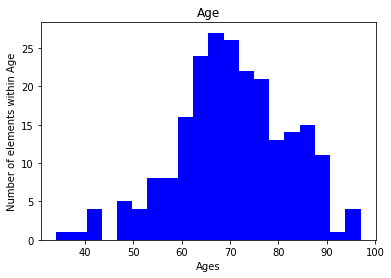

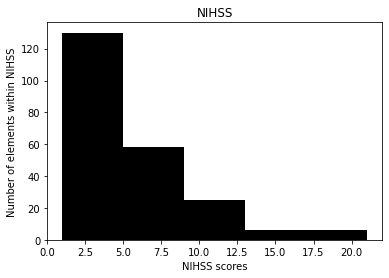

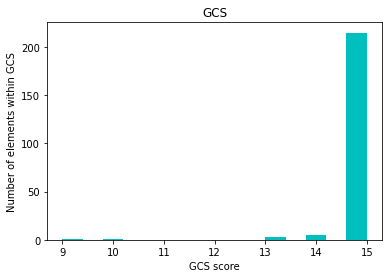

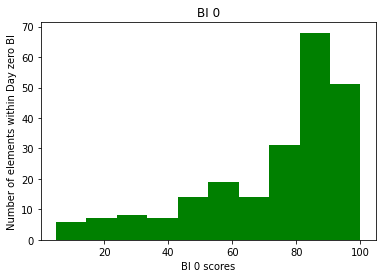

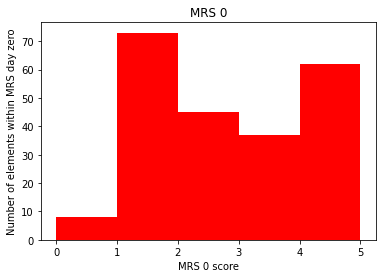

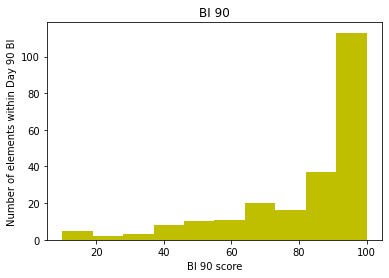

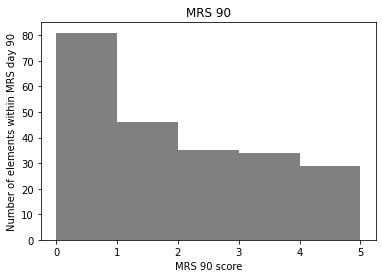

In [5]:
plt.title('Age')
plt.xlabel('Ages')
plt.ylabel('Number of elements within Age')
plt.hist(nihss_gen_df['age'], bins=20, color='b')
plt.savefig('Distribution of Age' + '.jpg')
plt.show()
plt.title('NIHSS')
plt.xlabel('NIHSS scores')
plt.ylabel('Number of elements within NIHSS')
plt.hist(nihss_gen_df['NIHSS  1 rater'], bins=5, color='k')
plt.savefig('Distribution of NIHSS'+ '.jpg')
plt.show()
plt.title('GCS')
plt.xlabel('GCS score')
plt.ylabel('Number of elements within GCS')
plt.hist(nihss_gen_df['GCS  '], bins=15, color='c')
plt.savefig('Distribution of Glasgow Coma Scale'+ '.jpg')
plt.show()
plt.title('BI 0')
plt.xlabel('BI 0 scores')
plt.ylabel('Number of elements within Day zero BI')
plt.hist(nihss_gen_df['BI '], bins=10, color='g')
plt.savefig('Distribution of Barthel Index'+ '.jpg')
plt.show()
plt.title('MRS 0')
plt.xlabel('MRS 0 score')
plt.ylabel('Number of elements within MRS day zero')
plt.hist(nihss_gen_df['MRS '], bins=5, color='r')
plt.savefig('Distribution of MRS Day 0'+ '.jpg')
plt.show()
plt.title('BI 90')
plt.xlabel('BI 90 score')
plt.ylabel('Number of elements within Day 90 BI')
plt.hist(nihss_gen_df['BI 90'], bins=10, color='y')
plt.savefig('Distribution of Barthel Index Day 90'+ '.jpg')
plt.show()
plt.title('MRS 90')
plt.xlabel('MRS 90 score')
plt.ylabel('Number of elements within MRS day 90')
plt.hist(nihss_gen_df['MRS 90'], bins=5, color='grey')
plt.savefig('Distribution of mRS Day 90'+ '.jpg')
plt.show()

In [6]:
columns = nihss_gen_df.columns
target = nihss_gen_df.iloc[:,4:6]
riskFactors = nihss_gen_df.iloc[:,0:]
riskFactors.drop(columns=['BI 90', 'MRS 90'], inplace = True)
nihss_gen_df.drop(columns=[i for i in columns[0:6]], inplace=True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nihss_gen_df = scaler.fit_transform(nihss_gen_df)
riskFactors = scaler.fit_transform(riskFactors)

In [8]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(riskFactors, 
                                                                                  target,
                                                                                  test_size=0.1,
                                                                                  shuffle=True)

In [9]:
try:
    n_inputs, n_outputs = train_data.shape[1], train_label.shape[1]
except:
    try:
        n_inputs = train_data.shape[1]
        n_outputs = 1
    except:
        n_inputs = 1
        n_outputs = 1

In [10]:
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [11]:
seed = 100
tf.random.set_seed(
    seed
)

In [12]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(n_inputs,)),
    tf.keras.layers.Dense(64, activation='linear'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_outputs, activation='linear')
])

2022-09-29 18:04:40.625630: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-29 18:04:40.625708: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brugha-linux): /proc/driver/nvidia/version does not exist
2022-09-29 18:04:40.626049: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer='adam',
              loss ='mean_absolute_error',
              metrics=['acc'])

In [14]:
import time
timer = time.time()
epoch = 5000
history = model.fit(
    train_data, 
    train_label, 
    epochs=epoch, 
    validation_split=0.2,
    verbose=0, batch_size=512
)
print(time.time() - timer)

389.49952387809753


In [15]:
test_loss, test_acc = model.evaluate(test_data,test_label)

1/1 [==============================] - 0s 19ms/step - loss: 1.1182 - acc: 1.0000


In [16]:
print('Accuracy: {}%'.format(np.round(test_acc*100),2),
     '\nLoss: {}'.format(test_loss))

Accuracy: 100.0% 
Loss: 1.1182140111923218


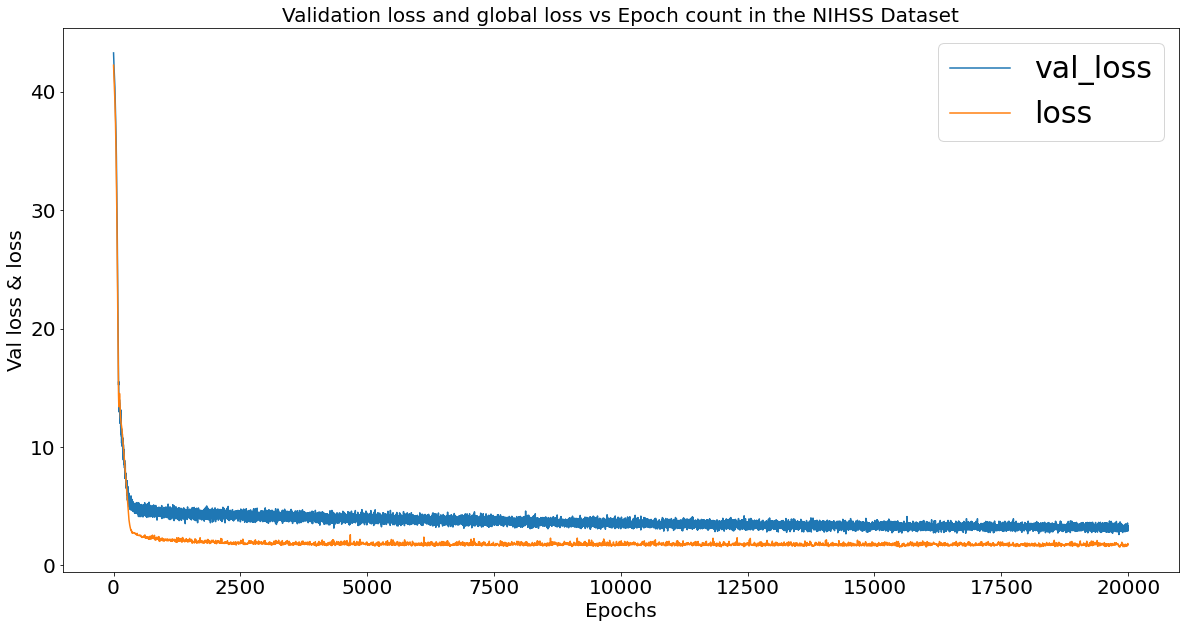

In [17]:
plt.figure(figsize=(20,10))
plt.tick_params(labelsize=20)
plt.plot(list(range(epoch)), history.history['loss'], history.history['val_loss'])
plt.title('Validation loss and global loss vs Epoch count in the NIHSS Dataset', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Val loss & loss', fontsize=20)
plt.legend(('val_loss', 'loss'), prop={'size':30})
plt.savefig('./val_lossVSloss.jpg')

In [18]:
list_of_predictions = []
for i in range(len(test_data)):
    a = test_data[i]
    a = np.expand_dims(a, 0)
    b = np.round(model.predict(a, verbose=0),1)
    list_of_predictions.append(b[0].tolist())
preds = model.predict(test_data,verbose=0)

In [19]:
def round_to_multiple(number, multiple):
    if type(number) is list or type(number) == np.ndarray:
        output = []
        assert len(number) == len(multiple) or len(number) == multiple, 'A multiple needs to be given for each number'
        for x in range(len(number)):
            if number[x] > 100:
                number[x] = 100
            output.append((multiple[x]) * np.round(number[x] / multiple[x]))
        return output
    else:
        return multiple * np.round(number / multiple)

In [20]:
round_to_multiple([27,13], [5,5])

[25.0, 15.0]

In [21]:
round_to_multiple(preds[0],[5,1]), round(preds[0][0]), test_label[0]

([70.0, 3.0], 69, array([70.,  3.]))

In [23]:
model.save('saved_model/NIHSS_model')

INFO:tensorflow:Assets written to: saved_model/NIHSS_model/assets


In [24]:
bi_preds = [round_to_multiple(preds[i][0],5) for i in range(len(preds))]
bi_label = [test_label[i][0] for i in range(len(test_label))]
mrs_preds = [round_to_multiple(preds[i][1],1) for i in range(len(preds))]
mrs_label = [test_label[i][1] for i in range(len(test_label))]

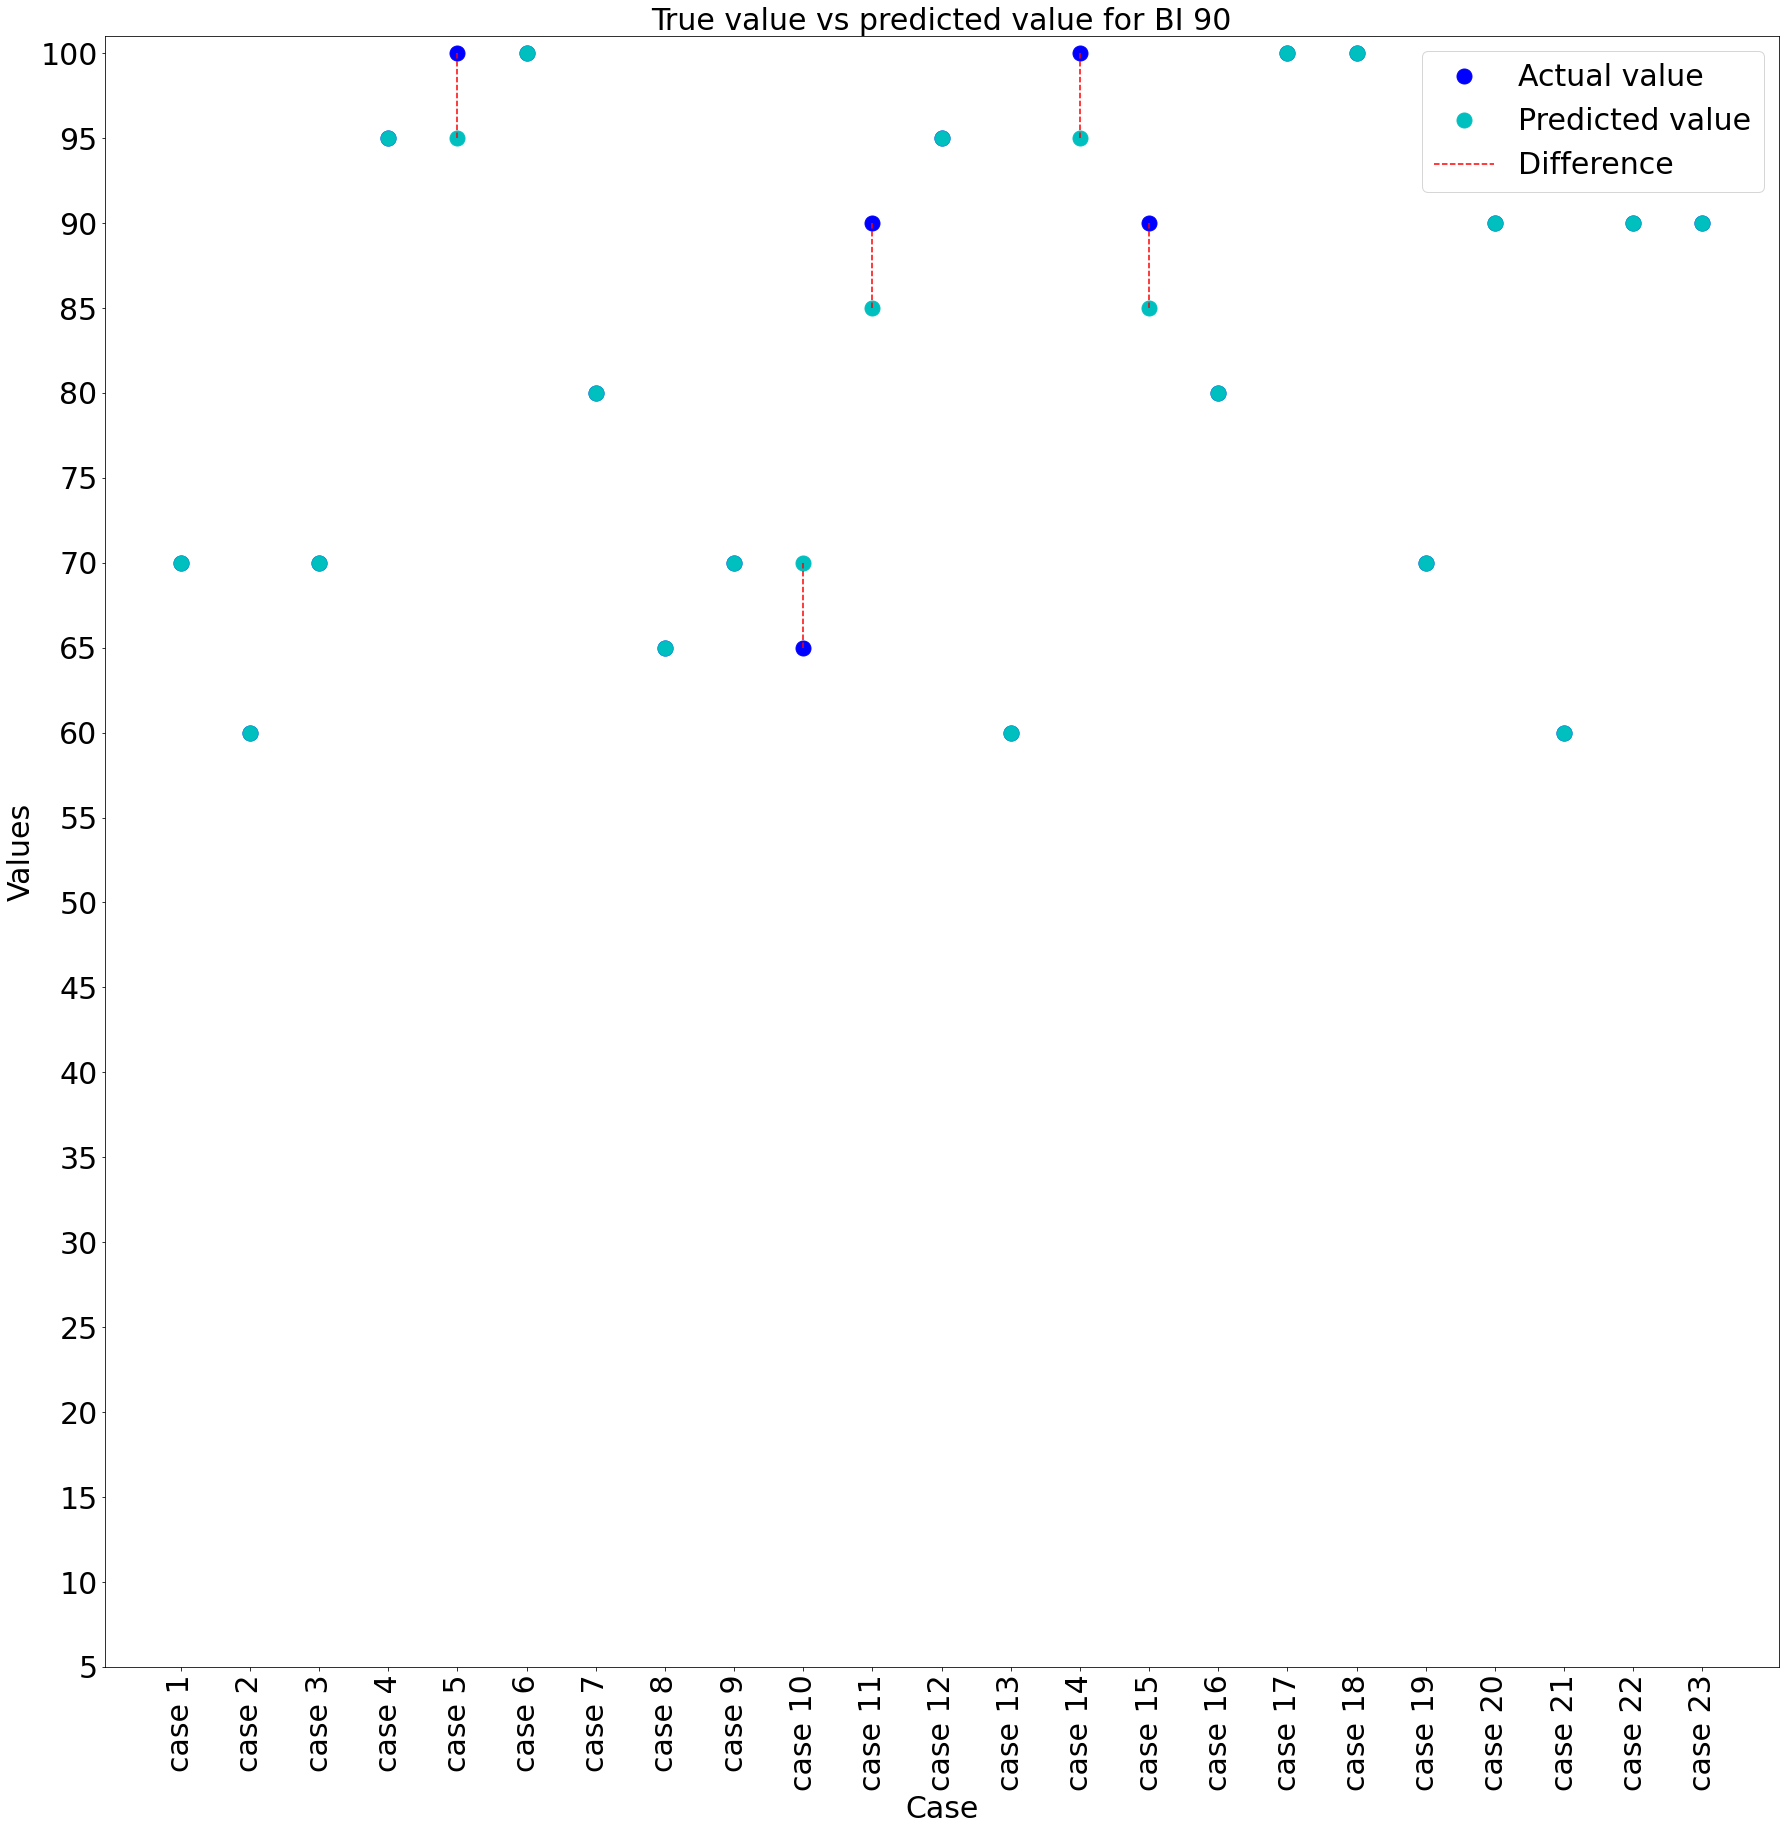

In [25]:
linespace = [f"case {str(i+1)}" for i in range(len(test_label))]

plt.figure(figsize=(30,30))
plt.ylim(5,101)
plt.yticks(np.arange(5,101, step=5))
plt.tick_params(labelsize=30)
plt.xticks(rotation=90)
plt.plot(linespace, bi_label,'bo', linestyle='None',markersize=15)
plt.plot(linespace, bi_preds,'co', linestyle='None',markersize=15)
plt.vlines(linespace,bi_label, bi_preds,'r' ,linestyle = '--')
plt.title('True value vs predicted value for BI 90', fontsize=30)
plt.xlabel('Case', fontsize=30)
plt.ylabel('Values',fontsize=30)
plt.legend(('Actual value', 'Predicted value', 'Difference'), prop={'size':30})
plt.savefig('./BI day 90 pred vs true.jpg',dpi=96)

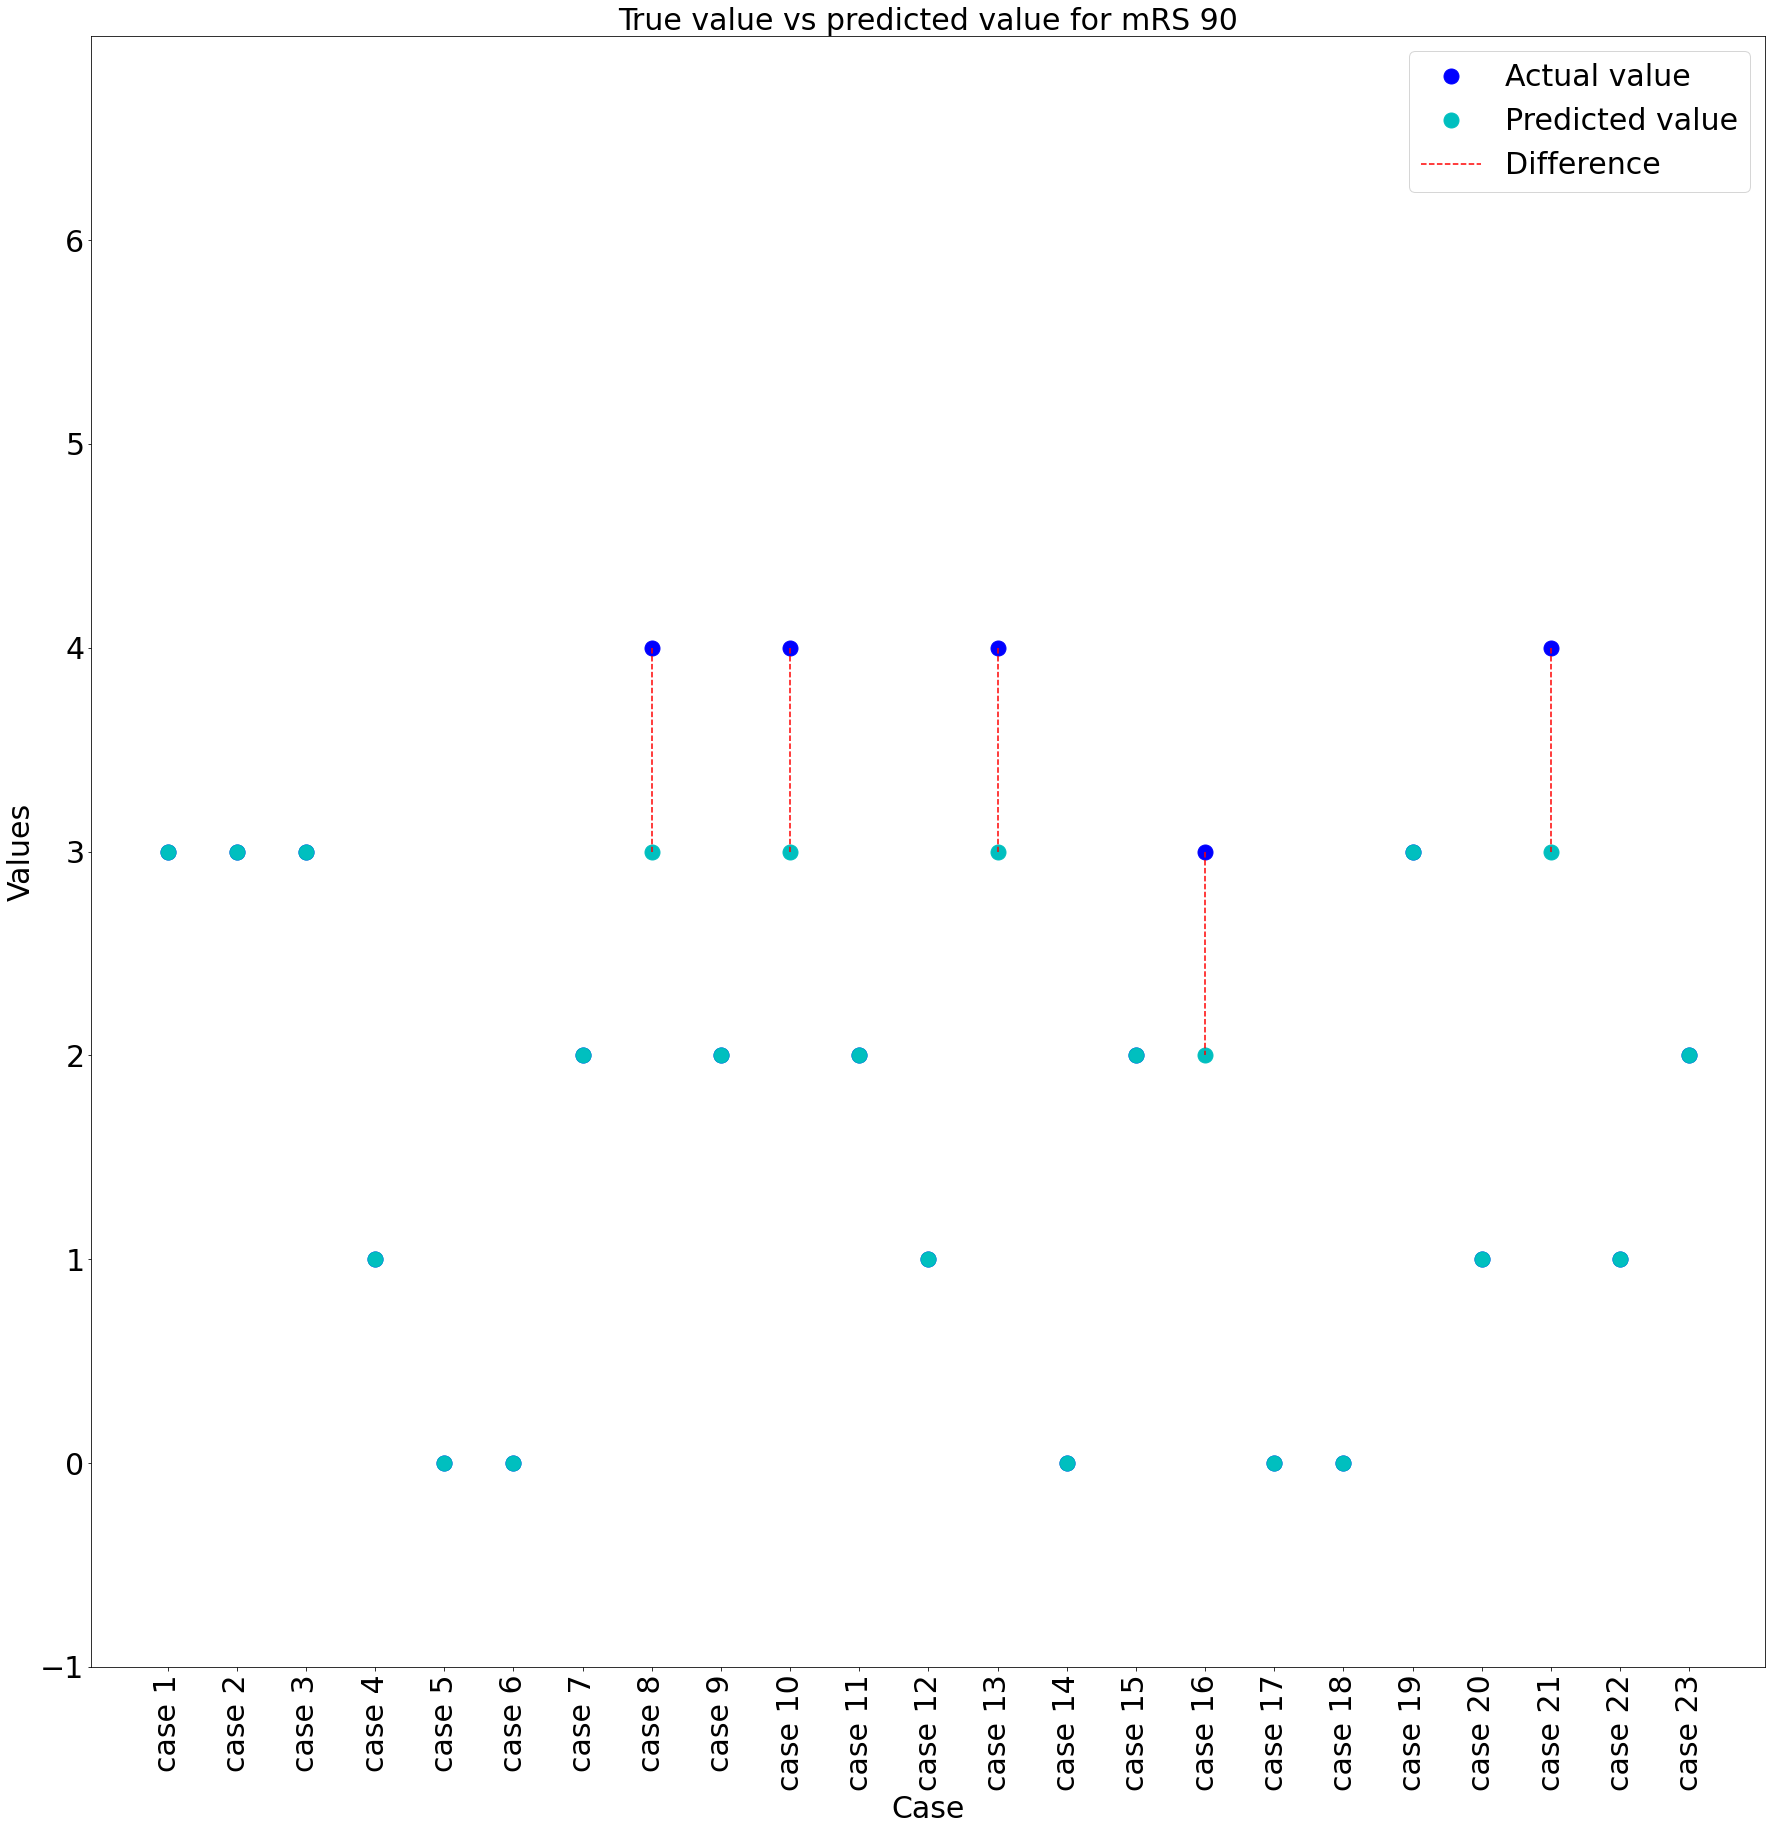

In [26]:
plt.figure(figsize=(30,30))
plt.ylim(-1,7)
plt.yticks(np.arange(-1,7, step=1))
plt.tick_params(labelsize=30)
plt.xticks(rotation=90)
plt.plot(linespace, mrs_label,'bo', linestyle='None',markersize=15)
plt.plot(linespace, mrs_preds,'co', linestyle='None',markersize=15)
plt.vlines(linespace,mrs_label, mrs_preds,'r' ,linestyle = '--')
plt.title('True value vs predicted value for mRS 90', fontsize=30)
plt.xlabel('Case', fontsize=30)
plt.ylabel('Values',fontsize=30)
plt.legend(('Actual value', 'Predicted value', 'Difference'), prop={'size':30})
plt.savefig('./mRS day 90 pred vs true.jpg')